In [1]:
import pandas as pd
import numpy as np
import json
import requests
import config
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#токен импортирован из другого файла в целях безопасности
api_key = config.api_key

In [3]:
#создаем класс для взаимодействия с API FRED
class FredData:
    
    def __init__(self, token=None):
        self.token = token
        self.root = 'https://api.stlouisfed.org/fred'
    
    def set_token(self, token):
        self.token = token
        
    #поиск по ключевым словам
    #сортировка по популярности по умолчанию
    def search_data(self, text, **kwargs):
        url = (
            f'{self.root}/series/search'
            f'?search_text={text}'
            f'&api_key={self.token}'
            f'&file_type=json'
        )
        response = requests.get(url)
        return pd.DataFrame(response.json()['seriess'])
    
    def get_series(self, series_id, **kwargs):
        url = (
            f'{self.root}/series/observations'
            f'?series_id={series_id}'
            f'&api_key={self.token}'
            f'&file_type=json'
        )
        units_url = (
            f'{self.root}/series?series_id={series_id}'
            f'&api_key={self.token}'
            f'&file_type=json'
        )
        response = requests.get(url)
        units_response = requests.get(units_url)
        units = units_response.json()['seriess'][0]['units']
        data = response.json()['observations']
        for observation in data:
            val = observation.get('value')
            if val == '.':
                val = np.nan
            else:
                val = float(val)
            observation['value'] = val
        df = pd.DataFrame(data)
        df['date'] = pd.to_datetime(df['date'])
        df['units'] = units
        df = df.set_index('date')[['value','units']]
        return df

In [4]:
fred_data = FredData(api_key)

In [5]:
#поиск series id по ключевым словам
fred_data.search_data('m2')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,M2SL,2023-06-07,2023-06-07,M2,1959-01-01,2023-04-01,Monthly,M,Billions of Dollars,Bil. of $,Seasonally Adjusted,SA,2023-05-23 12:02:03-05,94,96,"Before May 2020, M2 consists of M1 plus (1) sa..."
1,WM2NS,2023-06-07,2023-06-07,M2,1980-11-03,2023-05-01,"Weekly, Ending Monday",W,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-05-23 12:03:02-05,88,96,"Before May 2020, M2 consists of M1 plus (1) sa..."
2,M2NS,2023-06-07,2023-06-07,M2,1959-01-01,2023-04-01,Monthly,M,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-05-23 12:02:08-05,66,96,"Before May 2020, M2 consists of M1 plus (1) sa..."
3,M2V,2023-06-07,2023-06-07,Velocity of M2 Money Stock,1959-01-01,2023-01-01,Quarterly,Q,Ratio,Ratio,Seasonally Adjusted,SA,2023-05-25 07:58:01-05,83,83,Calculated as the ratio of quarterly nominal G...
4,M2REAL,2023-06-07,2023-06-07,Real M2 Money Stock,1959-01-01,2023-04-01,Monthly,M,Billions of 1982-84 Dollars,Bil. of 1982-84 $,Seasonally Adjusted,SA,2023-05-23 12:14:02-05,78,78,This series deflates M2 money stock (https://f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,DDOI07CFA648NWDB,2023-06-07,2023-06-07,Liquid Liabilities (Broad Money) for Central A...,1963-01-01,2019-01-01,Annual,A,Millions of 2000 Dollars,Mil. of 2000 $,Not Seasonally Adjusted,NSA,2022-03-23 16:28:03-05,0,0,Liquid liabilities are also known as broad mon...
546,DDOI07TZA648NWDB,2023-06-07,2023-06-07,Liquid Liabilities (Broad Money) for United Re...,1966-01-01,2020-01-01,Annual,A,Millions of 2000 Dollars,Mil. of 2000 $,Not Seasonally Adjusted,NSA,2022-03-23 16:27:48-05,0,0,Liquid liabilities are also known as broad mon...
547,DDOI07LAA648NWDB,2023-06-07,2023-06-07,Liquid Liabilities (Broad Money) for Lao Peopl...,1989-01-01,2010-01-01,Annual,A,Millions of 2000 Dollars,Mil. of 2000 $,Not Seasonally Adjusted,NSA,2022-03-23 16:27:55-05,0,0,Liquid liabilities are also known as broad mon...
548,DDOI07MKA648NWDB,2023-06-07,2023-06-07,Liquid Liabilities (Broad Money) for the forme...,1993-01-01,2020-01-01,Annual,A,Millions of 2000 Dollars,Mil. of 2000 $,Not Seasonally Adjusted,NSA,2022-03-23 16:27:54-05,0,0,Liquid liabilities are also known as broad mon...


In [6]:
nasdaq_index = fred_data.get_series('NASDAQ100')
nasdaq_index.head()

,value,units
date,,
1986-01-02,131.25,Index
1986-01-03,130.55,Index
1986-01-06,130.35,Index
1986-01-07,132.79,Index
1986-01-08,131.16,Index


In [7]:
sp500_index = fred_data.get_series('SP500')
sp500_index.head()

,value,units
date,,
2013-06-07,1643.38,Index
2013-06-10,1642.81,Index
2013-06-11,1626.13,Index
2013-06-12,1612.52,Index
2013-06-13,1636.36,Index


In [8]:
m2 = fred_data.get_series('M2SL')
m2.head()

,value,units
date,,
1959-01-01,286.6,Billions of Dollars
1959-02-01,287.7,Billions of Dollars
1959-03-01,289.2,Billions of Dollars
1959-04-01,290.1,Billions of Dollars
1959-05-01,292.2,Billions of Dollars


In [14]:
sns.set_style("darkgrid")

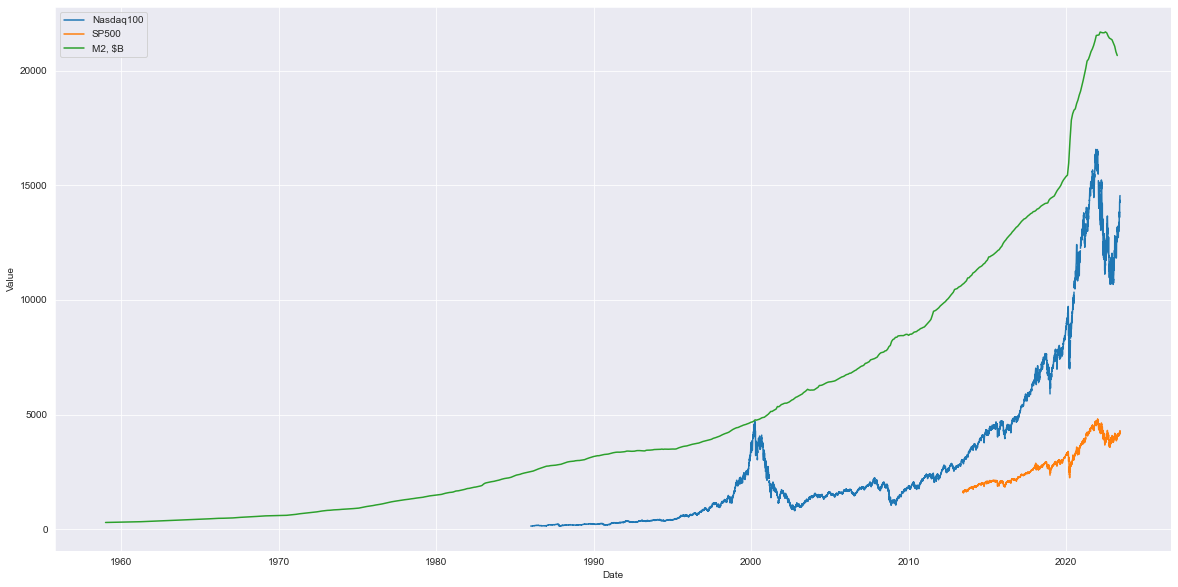

In [15]:
plt.figure(figsize = (20,10))
plt.plot(nasdaq_index['value'])
plt.plot(sp500_index['value'])
plt.plot(m2['value'])
plt.legend(['Nasdaq100','SP500','M2, $B'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [16]:
fred_data.search_data('assets').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,WALCL,2023-06-07,2023-06-07,Assets: Total Assets: Total Assets (Less Elimi...,2002-12-18,2023-05-31,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-06-01 15:34:03-05,97,96,NaN
1,RESPPANWW,2023-06-07,2023-06-07,Assets: Total Assets: Total Assets: Wednesday ...,2002-12-18,2023-05-31,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-06-01 15:34:08-05,70,70,NaN
2,MMMFFAQ027S,2023-06-07,2023-06-07,"Money Market Funds; Total Financial Assets, Level",1945-10-01,2022-10-01,Quarterly,Q,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2023-03-09 15:03:03-06,72,72,Source ID: FL634090005.Q\n\nFor more informati...
3,WSHOMCB,2023-06-07,2023-06-07,Assets: Securities Held Outright: Mortgage-Bac...,2002-12-18,2023-05-31,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-06-01 15:35:03-05,71,71,The current face value of mortgage-backed obli...
4,MMMFFAA027N,2023-06-07,2023-06-07,"Money Market Funds; Total Financial Assets, Level",1945-01-01,2022-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2023-03-09 14:59:04-06,8,72,Source ID: FL634090005.A\n\nFor more informati...


In [17]:
assets = fred_data.get_series('WALCL')

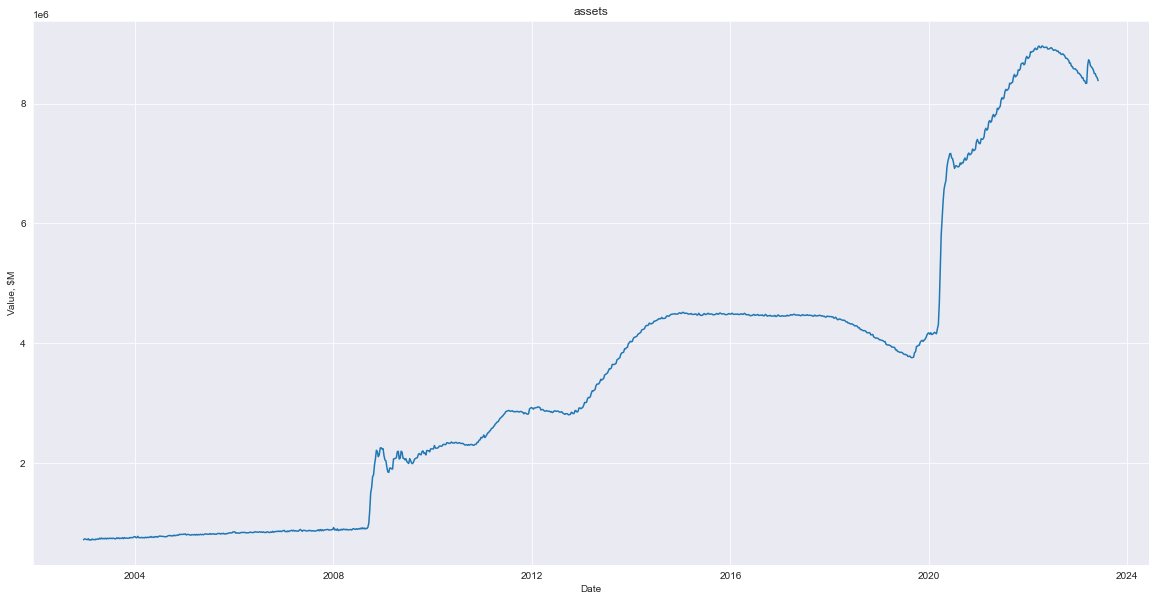

In [18]:
plt.figure(figsize = (20,10))
plt.plot(assets['value'])
plt.title('assets')
plt.xlabel('Date')
plt.ylabel('Value, $M')
plt.show()